In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

import time
import datetime as dt
from datetime import datetime

from pylab import rcParams
import seaborn as sns

In [179]:
data = pd.read_csv('train.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


**EXPLORATORY DATA ANALYSIS**

---



In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94268 entries, 0 to 94267
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            94268 non-null  object 
 1   Summary                   94268 non-null  object 
 2   Precip Type               94125 non-null  object 
 3   Temperature (C)           94268 non-null  float64
 4   Apparent Temperature (C)  94268 non-null  float64
 5   Humidity                  94268 non-null  float64
 6   Wind Speed (km/h)         94268 non-null  float64
 7   Wind Bearing (degrees)    94268 non-null  int64  
 8   Visibility (km)           94268 non-null  float64
 9   Cloud Cover               94268 non-null  int64  
 10  Pressure (millibars)      94268 non-null  float64
 11  Daily Summary             94268 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.6+ MB


In [181]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 143
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Cloud Cover                   0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [182]:
data.fillna(method='ffill', inplace=True) 

In [183]:
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Cloud Cover                 0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [184]:
#Categorical variables:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [185]:
#Quantitative variables:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Cloud Cover', 'Pressure (millibars)'],
      dtype='object')


In [186]:
#'Formatted Date' transformation:
data['Formatted Date']=pd.to_datetime(data['Formatted Date'],utc=True)
data['year'] = data['Formatted Date'].dt.year
data['month'] = data['Formatted Date'].dt.month
data['day'] = data['Formatted Date'].dt.day
data['hour'] = data['Formatted Date'].dt.hour
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary,year,month,day,hour
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,2006,3,31,22
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,2006,3,31,23
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,2006,4,1,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,2006,4,1,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,2006,4,1,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c13041f50>,
      dtype=object)

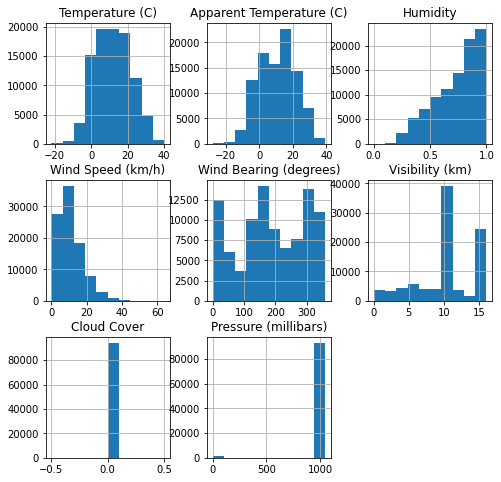

In [187]:
rcParams['figure.figsize'] = 8, 8
data[quantitative].hist()

In [188]:
data=data.drop('Cloud Cover',axis=1) ## Some observations are zero.It seems that they are missing values.

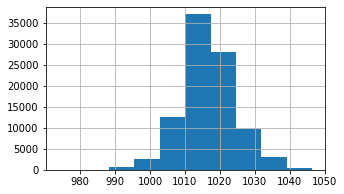

In [189]:
pressure_median = data['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
data["Pressure (millibars)"] = data.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

rcParams['figure.figsize'] = 5, 3
data['Pressure (millibars)'].hist()

 **Feature engineering**

---



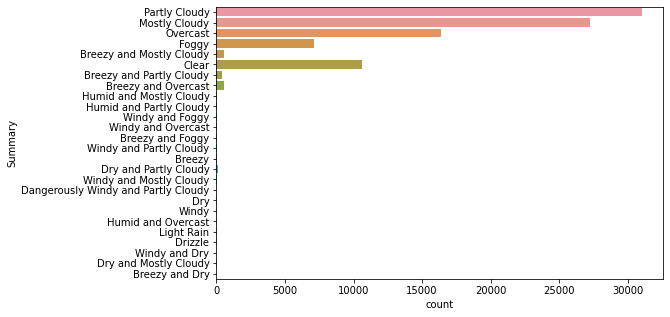

In [190]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['Summary'])

In [191]:
len(data['Summary'].unique()) #How many different 'Summary' categories are there?

26

There are 26 'Summary' categories which makes it a bit confusing. Let's see which are the most common.

In [192]:
summary_freq=pd.crosstab(index=data['Summary'],columns="count")  
summary_freq_rel = summary_freq/summary_freq.sum() 
summary_freq_rel.sort_values('count', ascending=False) #relative frequencies

col_0,count
Summary,
Partly Cloudy,0.329009
Mostly Cloudy,0.289038
Overcast,0.173877
Clear,0.112806
Foggy,0.075137
Breezy and Overcast,0.005580
Breezy and Mostly Cloudy,0.005463
Breezy and Partly Cloudy,0.004095
Dry and Partly Cloudy,0.000912


In [193]:
#new categorical variable:

def cloud_categorizer(row):
   row = str(row).lower()
   category = ""
   if "foggy" in row:
       category = 5
   elif "overcast" in row:
       category = 4
   elif "mostly cloudy" in row:
       category = 3
   elif "partly cloudy" in row:
       category = 2
   elif "clear" in row:
       category = 1
   else:
       category = 0
   return category 

data["cloud (summary)"] = data.apply (lambda row:cloud_categorizer(row["Summary"]) , axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


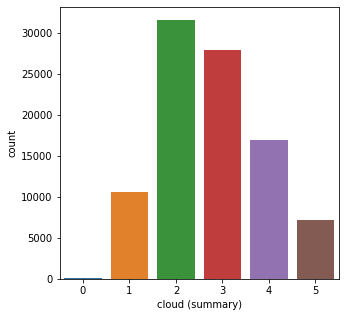

In [194]:
rcParams['figure.figsize'] = 5, 5
sns.countplot(data['cloud (summary)']) 

As can be observed, there are a few observations with no information about "clouds" or foggy in variable 'Summary'.
How can we assign a value to them?
I decided to look at variable 'Visibility (km)', which obviously is correlated to "clouds" and foggy.

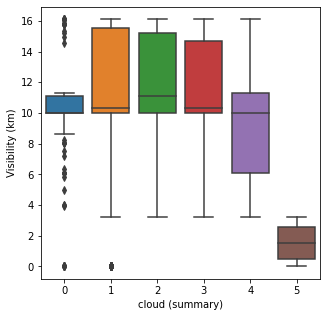

In [195]:
sns.boxplot(x=data['cloud (summary)'], y=data['Visibility (km)']) 

It seems that the boxplot of the null values is very similar to the one of "overcast"so let's assume that obsevations with no information about "clouds" and foggy fall in the "overcast" category.

In [196]:
def cloud_categorizer(row):
    row = str(row).lower()
    category = ""
    if "foggy" in row:
        category = 5
    elif "overcast" in row:
        category = 4
    elif "mostly cloudy" in row:
        category = 3
    elif "partly cloudy" in row:
        category = 2
    elif "clear" in row:
        category = 1
    else:
        category = 4 
    return category 

data["cloud (summary)"] = data.apply (lambda row:cloud_categorizer(row["Summary"]) , axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '1=Clear'),
 Text(0, 0, '2=Partly Cloudy'),
 Text(0, 0, '3=Mostly Cloudy'),
 Text(0, 0, '4=Overcast'),
 Text(0, 0, '5=Foggy')]

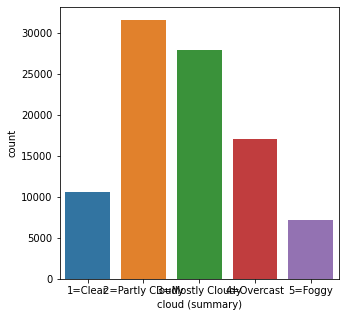

In [197]:
ax=sns.countplot(data['cloud (summary)'])
ax.set_xticklabels(('1=Clear', '2=Partly Cloudy', '3=Mostly Cloudy', '4=Overcast', '5=Foggy'))

In [198]:
len(data['Daily Summary'].unique()) #number of categories

207

In [199]:
daily_summary_freq =pd.crosstab(index=data['Daily Summary'],columns="count") 
daily_summary_freqrel=daily_summary_freq/daily_summary_freq.sum()
daily_summary_freqrel.sort_values('count', ascending=False).head(20)#Show the 20 most common categories

col_0,count
Daily Summary,
Mostly cloudy throughout the day.,0.206698
Partly cloudy throughout the day.,0.101805
Partly cloudy until night.,0.064168
Partly cloudy starting in the morning.,0.053719
Foggy in the morning.,0.044055
Foggy starting overnight continuing until morning.,0.037425
Partly cloudy until evening.,0.034370
Mostly cloudy until night.,0.032577
Overcast throughout the day.,0.030551


In [200]:
def cloud_categorizer2(row):
    row = str(row)
    category = ""
    if "Mostly cloudy throughout the day." in row:
        category = 5
    elif "Partly cloudy throughout the day." in row:
        category = 4
    elif "Partly cloudy until night." in row:
        category = 3
    elif "Partly cloudy starting in the morning." in row:
        category = 2
    elif "Foggy in the morning." in row:
        category = 1
    elif "Foggy starting overnight continuing until morning." in row:
        category = 6
    elif "Partly cloudy until evening." in row:
        category = 7
    elif "Mostly cloudy until night." in row:
        category = 8
    elif "Overcast throughout the day." in row:
        category = 9
    elif "Partly cloudy starting in the morning continuing until evening." in row:
        category = 10
    elif "Foggy until morning." in row:
        category = 11
    elif "Partly cloudy starting in the morning continuing until night." in row:
        category = 12
    elif "Mostly cloudy starting in the morning." in row:
        category = 13
    elif "Partly cloudy starting overnight." in row:
        category = 14
    elif "Foggy starting in the evening." in row:
        category = 15
    elif "Partly cloudy starting in the afternoon continuing until evening." in row:
        category = 16
    elif "Foggy overnight." in row:
        category = 17
    elif "Mostly cloudy starting overnight." in row:
        category = 18
    elif "Partly cloudy starting in the afternoon." in row:
        category = 19
    elif "Mostly cloudy until evening." in row:
        category = 20
    else:
        category = 0
    return category 

data["cloud (daily summary)"] = data.apply (lambda row:cloud_categorizer2(row["Daily Summary"]) , axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


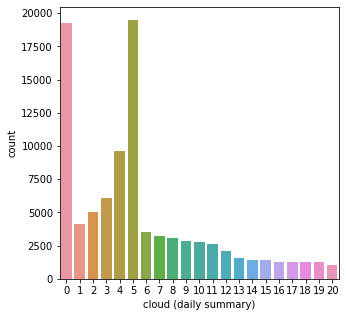

In [201]:
ax=sns.countplot(data['cloud (daily summary)'])

In [202]:
#label encoding precip type column
print(data['Precip Type'].value_counts())
data['Precip Type']=data['Precip Type'].replace(['rain','snow'],[0,1])
print(data['Precip Type'].value_counts())

rain    83556
snow    10712
Name: Precip Type, dtype: int64
0    83556
1    10712
Name: Precip Type, dtype: int64


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94268 entries, 0 to 94267
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            94268 non-null  datetime64[ns, UTC]
 1   Summary                   94268 non-null  object             
 2   Precip Type               94268 non-null  int64              
 3   Temperature (C)           94268 non-null  float64            
 4   Apparent Temperature (C)  94268 non-null  float64            
 5   Humidity                  94268 non-null  float64            
 6   Wind Speed (km/h)         94268 non-null  float64            
 7   Wind Bearing (degrees)    94268 non-null  int64              
 8   Visibility (km)           94268 non-null  float64            
 9   Pressure (millibars)      94268 non-null  float64            
 10  Daily Summary             94268 non-null  object             
 11  year           

In [204]:
data = data.drop('Formatted Date' , axis = 1)
data = data.drop('Summary' , axis = 1)
data = data.drop('Daily Summary' , axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94268 entries, 0 to 94267
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               94268 non-null  int64  
 1   Temperature (C)           94268 non-null  float64
 2   Apparent Temperature (C)  94268 non-null  float64
 3   Humidity                  94268 non-null  float64
 4   Wind Speed (km/h)         94268 non-null  float64
 5   Wind Bearing (degrees)    94268 non-null  int64  
 6   Visibility (km)           94268 non-null  float64
 7   Pressure (millibars)      94268 non-null  float64
 8   year                      94268 non-null  int64  
 9   month                     94268 non-null  int64  
 10  day                       94268 non-null  int64  
 11  hour                      94268 non-null  int64  
 12  cloud (summary)           94268 non-null  int64  
 13  cloud (daily summary)     94268 non-null  int64  
dtypes: flo

**DATA AUGMENTATION**

---



In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [209]:
#                                          decision tree 

X = data.drop('cloud (daily summary)', axis=1)
y = data['cloud (daily summary)']

dt1 = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

dt1.fit(X_train , y_train)
y_pred = dt1.predict(X_test)
print("accuracy score",accuracy_score(y_test,y_pred))



accuracy score 0.594957745482833


In [210]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28281 entries, 89630 to 40315
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               28281 non-null  int64  
 1   Temperature (C)           28281 non-null  float64
 2   Apparent Temperature (C)  28281 non-null  float64
 3   Humidity                  28281 non-null  float64
 4   Wind Speed (km/h)         28281 non-null  float64
 5   Wind Bearing (degrees)    28281 non-null  int64  
 6   Visibility (km)           28281 non-null  float64
 7   Pressure (millibars)      28281 non-null  float64
 8   year                      28281 non-null  int64  
 9   month                     28281 non-null  int64  
 10  day                       28281 non-null  int64  
 11  hour                      28281 non-null  int64  
 12  cloud (summary)           28281 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 3.0 MB


In [211]:
test_dataset = pd.read_csv('test.csv')
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            2185 non-null   object 
 1   Summary                   2185 non-null   object 
 2   Precip Type               1811 non-null   object 
 3   Temperature (C)           2185 non-null   float64
 4   Apparent Temperature (C)  2185 non-null   float64
 5   Humidity                  2185 non-null   float64
 6   Wind Speed (km/h)         2185 non-null   float64
 7   Wind Bearing (degrees)    2185 non-null   int64  
 8   Visibility (km)           2185 non-null   float64
 9   Cloud Cover               2185 non-null   int64  
 10  Pressure (millibars)      2185 non-null   float64
 11  Daily Summary             2185 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 205.0+ KB


**CLEANING THE TEST_DATA_SET**

---



In [212]:
test_dataset.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 374
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Cloud Cover                   0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [213]:
test_dataset = test_dataset.dropna(axis=0)

In [214]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1811 entries, 24 to 2184
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            1811 non-null   object 
 1   Summary                   1811 non-null   object 
 2   Precip Type               1811 non-null   object 
 3   Temperature (C)           1811 non-null   float64
 4   Apparent Temperature (C)  1811 non-null   float64
 5   Humidity                  1811 non-null   float64
 6   Wind Speed (km/h)         1811 non-null   float64
 7   Wind Bearing (degrees)    1811 non-null   int64  
 8   Visibility (km)           1811 non-null   float64
 9   Cloud Cover               1811 non-null   int64  
 10  Pressure (millibars)      1811 non-null   float64
 11  Daily Summary             1811 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 183.9+ KB


In [215]:
#'Formatted Date' transformation:
test_dataset['Formatted Date']=pd.to_datetime(test_dataset['Formatted Date'],utc=True)
test_dataset['year'] = test_dataset['Formatted Date'].dt.year
test_dataset['month'] = test_dataset['Formatted Date'].dt.month
test_dataset['day'] = test_dataset['Formatted Date'].dt.day
test_dataset['hour'] = test_dataset['Formatted Date'].dt.hour

test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1811 entries, 24 to 2184
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            1811 non-null   datetime64[ns, UTC]
 1   Summary                   1811 non-null   object             
 2   Precip Type               1811 non-null   object             
 3   Temperature (C)           1811 non-null   float64            
 4   Apparent Temperature (C)  1811 non-null   float64            
 5   Humidity                  1811 non-null   float64            
 6   Wind Speed (km/h)         1811 non-null   float64            
 7   Wind Bearing (degrees)    1811 non-null   int64              
 8   Visibility (km)           1811 non-null   float64            
 9   Cloud Cover               1811 non-null   int64              
 10  Pressure (millibars)      1811 non-null   float64            
 11  Daily Summary   

In [216]:
test_dataset["cloud (summary)"] = test_dataset.apply (lambda row:cloud_categorizer(row["Summary"]) , axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '1=Clear'),
 Text(0, 0, '2=Partly Cloudy'),
 Text(0, 0, '3=Mostly Cloudy'),
 Text(0, 0, '4=Overcast'),
 Text(0, 0, '5=Foggy')]

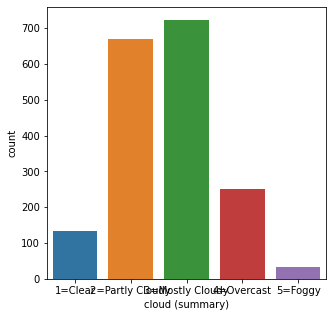

In [217]:
ax=sns.countplot(test_dataset['cloud (summary)'])
ax.set_xticklabels(('1=Clear', '2=Partly Cloudy', '3=Mostly Cloudy', '4=Overcast', '5=Foggy'))

In [218]:
#label encoding precip type column
print(test_dataset['Precip Type'].value_counts())
test_dataset['Precip Type']=test_dataset['Precip Type'].replace(['rain','snow'],[0,1])
print(test_dataset['Precip Type'].value_counts())

rain    1811
Name: Precip Type, dtype: int64
0    1811
Name: Precip Type, dtype: int64


In [219]:
test_dataset["cloud (daily summary)"] = test_dataset.apply (lambda row:cloud_categorizer2(row["Daily Summary"]) , axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


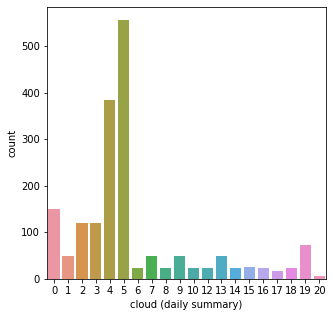

In [220]:
ax=sns.countplot(test_dataset['cloud (daily summary)'])

In [222]:
test_dataset=test_dataset.drop('Cloud Cover',axis=1)

In [221]:
test_dataset = test_dataset.drop('Formatted Date' , axis = 1)
test_dataset = test_dataset.drop('Summary' , axis = 1)
test_dataset = test_dataset.drop('Daily Summary' , axis = 1)
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1811 entries, 24 to 2184
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               1811 non-null   int64  
 1   Temperature (C)           1811 non-null   float64
 2   Apparent Temperature (C)  1811 non-null   float64
 3   Humidity                  1811 non-null   float64
 4   Wind Speed (km/h)         1811 non-null   float64
 5   Wind Bearing (degrees)    1811 non-null   int64  
 6   Visibility (km)           1811 non-null   float64
 7   Cloud Cover               1811 non-null   int64  
 8   Pressure (millibars)      1811 non-null   float64
 9   year                      1811 non-null   int64  
 10  month                     1811 non-null   int64  
 11  day                       1811 non-null   int64  
 12  hour                      1811 non-null   int64  
 13  cloud (summary)           1811 non-null   int64  
 14  cloud (

In [223]:
X_test_dataset = test_dataset.drop('cloud (daily summary)', axis=1)
y_test_dataset = test_dataset['cloud (daily summary)']

In [239]:
X_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1811 entries, 24 to 2184
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               1811 non-null   int64  
 1   Temperature (C)           1811 non-null   float64
 2   Apparent Temperature (C)  1811 non-null   float64
 3   Humidity                  1811 non-null   float64
 4   Wind Speed (km/h)         1811 non-null   float64
 5   Wind Bearing (degrees)    1811 non-null   int64  
 6   Visibility (km)           1811 non-null   float64
 7   Pressure (millibars)      1811 non-null   float64
 8   year                      1811 non-null   int64  
 9   month                     1811 non-null   int64  
 10  day                       1811 non-null   int64  
 11  hour                      1811 non-null   int64  
 12  cloud (summary)           1811 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 262.6 KB


**ACCURACY PREDICTION ON GIVEN TEST DATA**

---



In [224]:
y_pred_test_dataset = dt1.predict(X_test_dataset)
print("accuracy score",accuracy_score(y_test_dataset,y_pred_test_dataset))

accuracy score 0.18277194919933737


In [225]:
print(y_pred_test_dataset)

[ 5  5 18 ...  2 13  2]


EVALUATE SAMPLES

In [228]:
evaluate = pd.read_csv('evaluate.csv')
evaluate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            719 non-null    object 
 1   Summary                   719 non-null    object 
 2   Precip Type               719 non-null    object 
 3   Temperature (C)           719 non-null    float64
 4   Apparent Temperature (C)  719 non-null    float64
 5   Humidity                  719 non-null    float64
 6   Wind Speed (km/h)         719 non-null    float64
 7   Wind Bearing (degrees)    719 non-null    int64  
 8   Visibility (km)           719 non-null    float64
 9   Cloud Cover               719 non-null    int64  
 10  Pressure (millibars)      719 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 61.9+ KB


In [229]:
#'Formatted Date' transformation:
evaluate['Formatted Date']=pd.to_datetime(evaluate['Formatted Date'],utc=True)
evaluate['year'] = evaluate['Formatted Date'].dt.year
evaluate['month'] = evaluate['Formatted Date'].dt.month
evaluate['day'] = evaluate['Formatted Date'].dt.day
evaluate['hour'] = evaluate['Formatted Date'].dt.hour

evaluate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            719 non-null    datetime64[ns, UTC]
 1   Summary                   719 non-null    object             
 2   Precip Type               719 non-null    object             
 3   Temperature (C)           719 non-null    float64            
 4   Apparent Temperature (C)  719 non-null    float64            
 5   Humidity                  719 non-null    float64            
 6   Wind Speed (km/h)         719 non-null    float64            
 7   Wind Bearing (degrees)    719 non-null    int64              
 8   Visibility (km)           719 non-null    float64            
 9   Cloud Cover               719 non-null    int64              
 10  Pressure (millibars)      719 non-null    float64            
 11  year               

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '1=Clear'),
 Text(0, 0, '2=Partly Cloudy'),
 Text(0, 0, '3=Mostly Cloudy'),
 Text(0, 0, '4=Overcast'),
 Text(0, 0, '5=Foggy')]

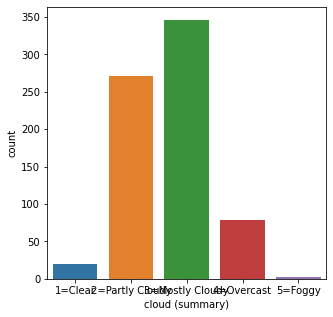

In [230]:
evaluate["cloud (summary)"] = evaluate.apply (lambda row:cloud_categorizer(row["Summary"]) , axis = 1)
ax=sns.countplot(evaluate['cloud (summary)'])
ax.set_xticklabels(('1=Clear', '2=Partly Cloudy', '3=Mostly Cloudy', '4=Overcast', '5=Foggy'))

In [231]:
#label encoding precip type column
print(evaluate['Precip Type'].value_counts())
evaluate['Precip Type']=evaluate['Precip Type'].replace(['rain','snow'],[0,1])
print(evaluate['Precip Type'].value_counts())

rain    719
Name: Precip Type, dtype: int64
0    719
Name: Precip Type, dtype: int64


In [233]:
evaluate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            719 non-null    datetime64[ns, UTC]
 1   Summary                   719 non-null    object             
 2   Precip Type               719 non-null    int64              
 3   Temperature (C)           719 non-null    float64            
 4   Apparent Temperature (C)  719 non-null    float64            
 5   Humidity                  719 non-null    float64            
 6   Wind Speed (km/h)         719 non-null    float64            
 7   Wind Bearing (degrees)    719 non-null    int64              
 8   Visibility (km)           719 non-null    float64            
 9   Cloud Cover               719 non-null    int64              
 10  Pressure (millibars)      719 non-null    float64            
 11  year               

In [234]:
evaluate = evaluate.drop('Formatted Date' , axis = 1)
evaluate = evaluate.drop('Summary' , axis = 1)
evaluate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               719 non-null    int64  
 1   Temperature (C)           719 non-null    float64
 2   Apparent Temperature (C)  719 non-null    float64
 3   Humidity                  719 non-null    float64
 4   Wind Speed (km/h)         719 non-null    float64
 5   Wind Bearing (degrees)    719 non-null    int64  
 6   Visibility (km)           719 non-null    float64
 7   Cloud Cover               719 non-null    int64  
 8   Pressure (millibars)      719 non-null    float64
 9   year                      719 non-null    int64  
 10  month                     719 non-null    int64  
 11  day                       719 non-null    int64  
 12  hour                      719 non-null    int64  
 13  cloud (summary)           719 non-null    int64  
dtypes: float64

In [240]:
evaluate = evaluate.drop('Cloud Cover' , axis = 1)

In [241]:
X_evaluate = evaluate

In [243]:
y_pred_evaluate = dt1.predict(X_evaluate)
print(len(y_pred_evaluate))

719


In [245]:
evaluate_ypred = pd.DataFrame(y_pred_evaluate)
evaluate_ypred.info()
evaluate_ypred.to_csv('evaluate_ypred.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       719 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB
